In [1]:
pip install pandas numpy scikit-learn imbalanced-learn xgboost shap matplotlib seaborn joblib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [3]:
# Load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\loan_default_prediction.csv")

# Quick look
print(df.shape)           # rows, columns
print(df.head())          # first 5 rows
print(df.info())          # datatypes + nulls
print(df.isnull().sum())  # missing values


(1000, 5)
  loan_id  income  loan_amount employment_status  default
0   L1000    9270        22969          Employed        1
1   L1001    2860        46659          Employed        0
2   L1002    7390        38545        Unemployed        1
3   L1003    7191        37668          Employed        0
4   L1004   13964        24061          Employed        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   loan_id            1000 non-null   object
 1   income             1000 non-null   int64 
 2   loan_amount        1000 non-null   int64 
 3   employment_status  1000 non-null   object
 4   default            1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB
None
loan_id              0
income               0
loan_amount          0
employment_status    0
default              0
dtype: int64


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle



# Drop loan_id (not useful for prediction)
df = df.drop("loan_id", axis=1)

# Encode employment_status manually
df["employment_status"] = df["employment_status"].map({"Employed":1, "Unemployed":0})


# Features and target
X = df.drop("default", axis=1)
y = df["default"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


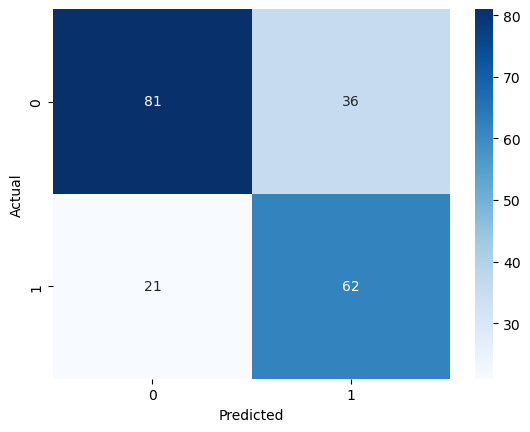

In [28]:
# Confusion Matrix for Random Forest
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
# Save model
with open("loan_default_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [9]:
import streamlit as st
import pickle
import numpy as np

# Load model and scaler
with open("loan_default_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

st.title("Loan Default Prediction App")

income = st.number_input("Applicant Income")
loan_amount = st.number_input("Loan Amount")
employment_status = st.selectbox("Employment Status", ["Employed", "Unemployed"])

if st.button("Predict"):
    # Encode employment status manually
    emp = 1 if employment_status == "Employed" else 0

    # Prepare data
    data = np.array([[income, loan_amount, emp]])
    data_scaled = scaler.transform(data)

    # Predict
    prediction = model.predict(data_scaled)[0]
    if prediction == 1:
        st.error("⚠️ Loan will Default!")
    else:
        st.success("✅ Loan will be Repaid!")


2025-08-17 14:50:15.971 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-17 14:50:15.974 Session state does not function when running a script without `streamlit run`
